# framewise displacement (FD)

In [1]:

#!/usr/bin/python
 
import glob
import os
import sys
import subprocess
 
analysis_path = '/mnt/d/Data/Chick/Imprinting/analysis'
 
bold_files = glob.glob('%s/sub*/results/bold.nii.gz'%(analysis_path))


# I'm using a big html file to put all QA info together.  If you have other suggestions, let me know!
outhtml = "/mnt/d/Data/Chick/Imprinting/analysis/motion_parameters/bold_motion_QA_FD.html"
out_bad_bold_list = "/mnt/d/Data/Chick/Imprinting/analysis/motion_parameters/subs_lose_gt_48_vol_scrub_FD.txt"
 
os.system("rm %s"%(out_bad_bold_list))
os.system("rm %s"%(outhtml))
 
for cur_bold in bold_files:
    print(cur_bold)
    # Store directory name
    cur_dir = os.path.dirname(cur_bold)
     
    # strip off .nii.gz from file name (makes code below easier)
    cur_bold_no_nii = cur_bold[:-7]
     
    #  You can also use fslreorient2std BUT
    #  BUT BUT BUT DO NOT RUN THIS UNLESS YOUR DATA ACTUALLY NEED IT!
    #os.system("fslswapdim %s z -x -y %s_swapped"%(cur_bold_no_nii, cur_bold_no_nii))
    # Once you're confident this works correctly, you can change the above to
    #  overwrite bold.nii.gz (saves disc space)
 
    # This is used to trim off unwanted volumes
    # DO NOT USE THIS UNLESS YOU'VE DOUBLE CHECKED HOW MANY
    # VOLUMES NEED TO BE TRIMMED (IF ANY)
    # This trims first 2 and I set the max to a number far beyond
    # the number of TRs
    # Correct filename here to use output of previous step (if used)
    #os.system("fslroi %s %s_trimmed 2 300"%(cur_bold_no_nii, cur_bold_no_nii))
    # Once you're confident this works correctly, you can change the above to
    #   overwrite bold.nii.gz
 
    # Assessing motion.  This is what takes the longest
    # Check current literature to see if this thresh (0.9) is
    #  acceptable
    # I got it from here: http://www.ncbi.nlm.nih.gov/pubmed/23861343
    # Also, consider using FSL's FIX to clean your data
    if os.path.isdir("%s/motion_assess/"%(cur_dir))==False:
        os.system("mkdir %s/motion_assess"%(cur_dir))
    # we used threshold of 2.5 (after upscaling by factor of 10) to have half voxel size
    os.system("fsl_motion_outliers -i %s -o %s/motion_assess/confound.txt --fd --thresh=2.5 -p %s/motion_assess/fd_plot -s %s/motion_assess/fd_par.txt -v > %s/motion_assess/outlier_output.txt"%(cur_bold_no_nii, cur_dir, cur_dir, cur_dir, cur_dir))
 
    # Put confound info into html file for review later on
    os.system("cat %s/motion_assess/outlier_output.txt >> %s"%(cur_dir, outhtml))
    os.system("echo '<p>=============<p>FD plot %s <br><IMG BORDER=0 SRC=%s/motion_assess/fd_plot.png WIDTH=100%s></BODY></HTML>' >> %s"%(cur_dir, cur_dir,'%', outhtml))
 
    # Last, if we're planning on modeling out scrubbed volumes later
    #   it is helpful to create an empty file if confound.txt isn't
    #   generated (i.e. no scrubbing needed).  It is basically a
    #   place holder to make future scripting easier
    if os.path.isfile("%s/motion_assess/confound.txt"%(cur_dir))==False:
        os.system("touch %s/motion_assess/confound.txt"%(cur_dir))
 
    # Very last, create a list of subjects who exceed a threshold for
    #  number of scrubbed volumes.  This should be taken seriously.  If
    #  most of your scrubbed data are occurring during task, that's
    #  important to consider (e.g. subject with 20 volumes scrubbed
    #  during task is much worse off than subject with 20 volumes
    #  scrubbed during baseline.
    # These data have about 182 volumes and I'd hope to keep 140
    #  DO NOT USE 140 JUST BECAUSE I AM.  LOOK AT YOUR DATA AND
    #  COME TO AN AGREED VALUE WITH OTHER RESEARCHERS IN YOUR GROUP
    output = subprocess.check_output("grep -o 1 %s/motion_assess/confound.txt | wc -l"%(cur_dir), shell=True)
    num_scrub = [int(s) for s in output.split() if s.isdigit()]
    if num_scrub[0]>130:
        with open(out_bad_bold_list, "a") as myfile:
            myfile.write("%s\n"%(cur_bold))


/mnt/d/Data/Chick/Imprinting/analysis/sub09/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub11/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub12/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub18/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub19/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub21/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub22/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub24/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub29/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub31/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub32/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub34/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub35/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub36/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub37/results/bold.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/su

# plot all FD signals

Populating the interactive namespace from numpy and matplotlib
analysis/sub09


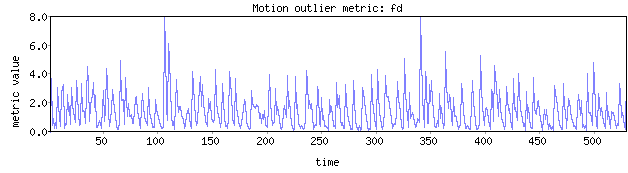

analysis/sub11


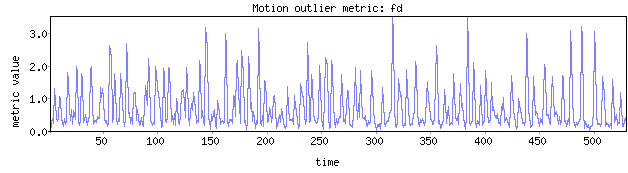

analysis/sub12


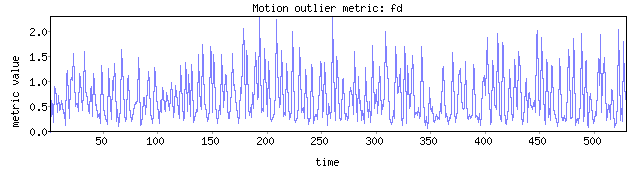

analysis/sub18


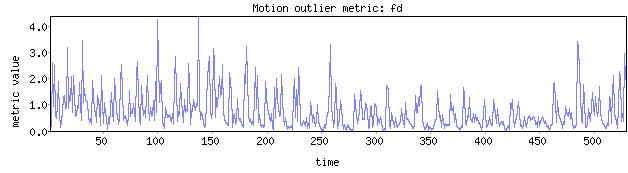

analysis/sub19


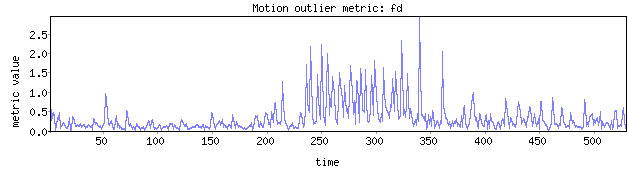

analysis/sub21


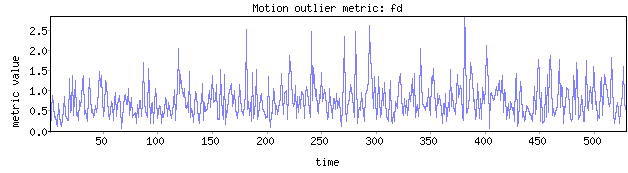

analysis/sub22


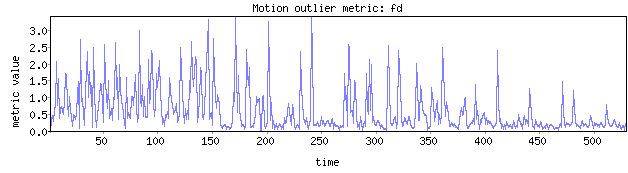

analysis/sub24


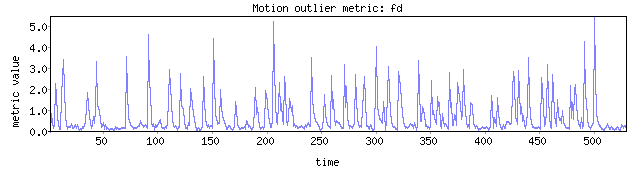

analysis/sub29


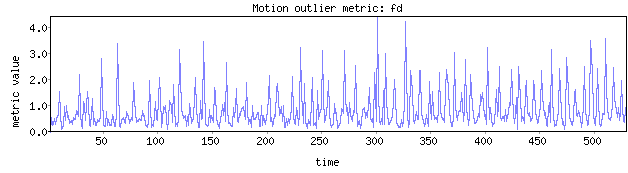

analysis/sub31


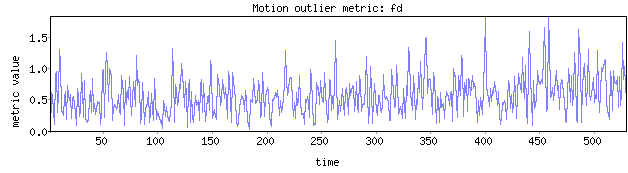

analysis/sub32


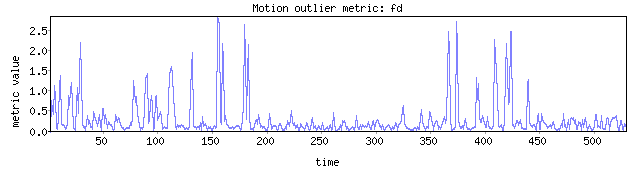

analysis/sub34


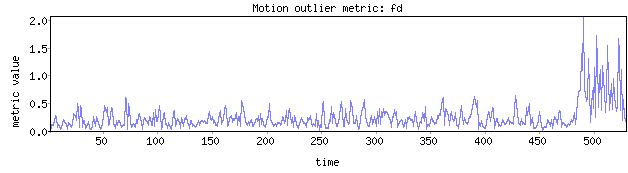

analysis/sub35


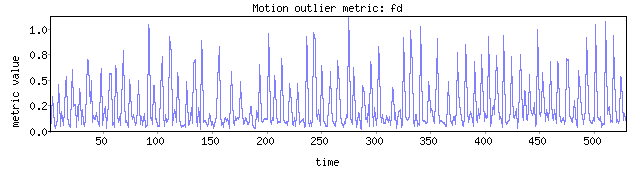

analysis/sub36


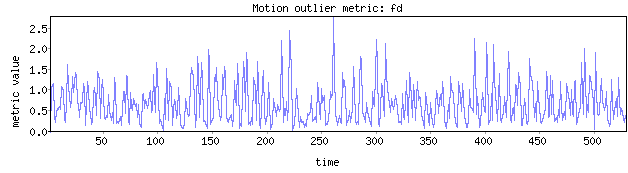

analysis/sub37


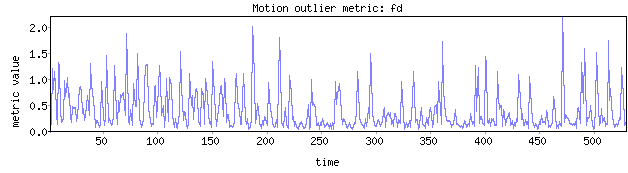

analysis/sub38


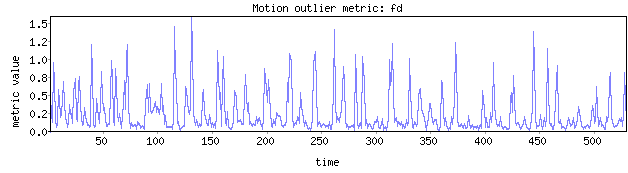

analysis/sub39


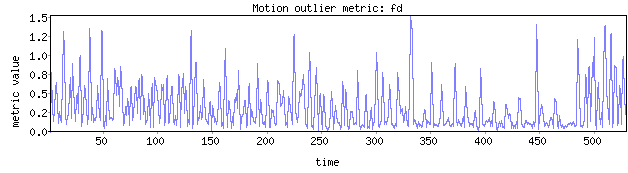

analysis/sub40


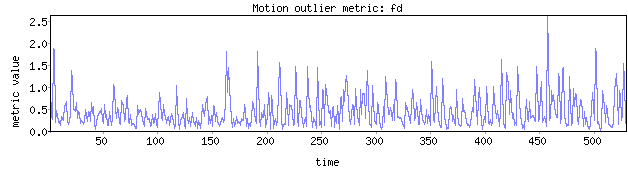

analysis/sub42


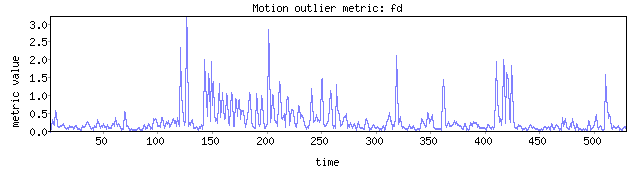

analysis/sub43


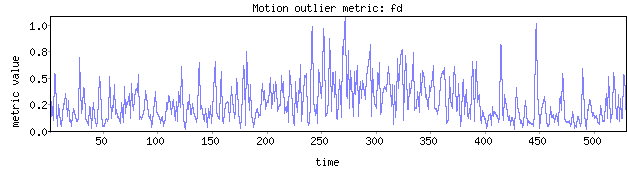

analysis/sub44


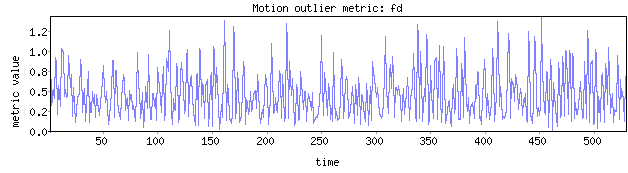

analysis/sub46


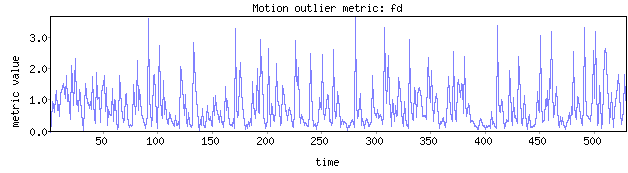

analysis/sub47


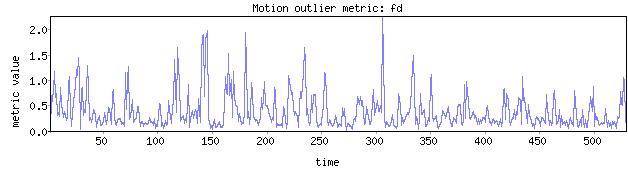

analysis/sub48


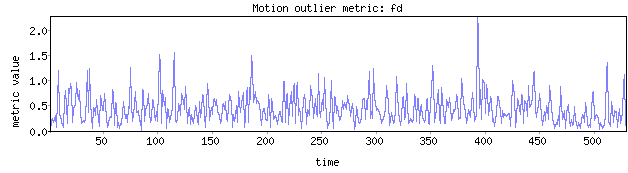

In [2]:
%matplotlib inline
%pylab inline

from IPython.display import display, Image
import glob
import os

data_path = '/mnt/d/Data/Chick/Imprinting/analysis'
FD_dirs = glob.glob('%s/sub*/results/motion_assess/fd_plot.png'%(data_path))

for curr_FD in FD_dirs:
    
    #print(curr_reg)
    print(curr_FD.split('/')[-5]+'/'+curr_FD.split('/')[-4])
    plt.show()
    display(Image(filename=curr_FD))

Plot FD parameters over all animals

Populating the interactive namespace from numpy and matplotlib


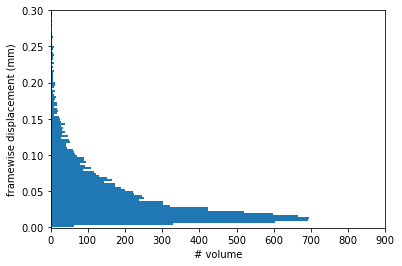

In [56]:
%matplotlib inline
%pylab inline
# import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
data_path = '/mnt/d/Data/Chick/Imprinting/analysis'
 
FD_files = glob.glob('%s/sub*/results/motion_assess/fd_par.txt'%(data_path))
FD_data = []
for cur_FD in FD_files[4:]:
    #print(cur_FD)
    f = open(cur_FD, "r")
    for line in f:
        if line != " ":
            FD_data.append((float(line.rsplit()[0]))/10)
            
plt.hist(FD_data, bins=200, orientation='horizontal')
plt.ylabel('framewise displacement (mm)')
plt.xlabel('# volume')
plt.xlim([0,900])
plt.ylim([-0.001,0.3])
plt.style.context('seaborn-bright')
plt.savefig(os.path.join(data_path,'motion_parameters/FD.svg'), format='svg', dpi=1200)
plt.savefig(os.path.join(data_path,'motion_parameters/FD.png'))


In [59]:
output = os.path.join(data_path,'motion_parameters/FD_data.txt')
with open(output, 'w') as f:
    for item in FD_data:
        f.write("%s\n" % item)

In [15]:
#or function version
def length_of_list(list_of_numbers, number):
    x = [i for i in list_of_numbers if i > number]
    return len(x)

In [16]:
import glob
import matplotlib.pyplot as plt
import matplotlib
path = '/mnt/d/Data/Chick/Imprinting/analysis'
 
FD_files = glob.glob('%s/sub*/results/motion_assess/fd_par.txt'%(path))
FD_data = []
for cur_FD in list(FD_files):
    FD_data = []
    
    #print(cur_FD)
    f = open(cur_FD, "r")
    for line in f:
        if line != " ":
            FD_data.append((float(line.rsplit()[0]))/10)
    print(cur_FD.split('/')[-4], ' --->> ', length_of_list(FD_data, 0.2))

sub09  --->>  135
sub11  --->>  40
sub12  --->>  8
sub18  --->>  41
sub19  --->>  6
sub21  --->>  10
sub22  --->>  33
sub24  --->>  48
sub29  --->>  44
sub31  --->>  0
sub32  --->>  13
sub34  --->>  1
sub35  --->>  0
sub36  --->>  9
sub37  --->>  2
sub38  --->>  0
sub39  --->>  0
sub40  --->>  1
sub42  --->>  8
sub43  --->>  0
sub44  --->>  0
sub46  --->>  36
sub47  --->>  1
sub48  --->>  2
